In [10]:
import pandas as pd
import seaborn as sns

In [11]:
input_dir = '/Users/bryanmichalek/Documents/GitHub_Personal/sports_betting_data/05-evaluation'

In [12]:
baseline_bets = pd.read_csv(f'{input_dir}/baseline/test/baseline_bet_list.csv')
nhlnet_bets = pd.read_csv(f'{input_dir}/NHLnet/test/NHLnet_bet_list.csv')
nhlnet_bin_bets = pd.read_csv(f'{input_dir}/NHLnetBinary/test/NHLnetBinary_bet_list.csv')

In [13]:
baseline_bets['model'] = 'baseline'
nhlnet_bets['model'] = 'nhlnet'
nhlnet_bin_bets['model'] = 'nhlnet_bin'
combined = pd.concat([baseline_bets, nhlnet_bets, nhlnet_bin_bets], axis=0)
combined

,player_id,date,odds,pred_G,G,prob,EV,win_flag,place_bet_flag,profit,model,G_flag
0,acciano01,2023-10-13,550,0.1333,0.0,0.008133,-0.947135,0.0,0,0.0,baseline,NaN
1,acciano01,2023-10-14,550,0.1333,0.0,0.008133,-0.947135,0.0,0,0.0,baseline,NaN
2,acciano01,2023-10-18,550,0.1333,0.0,0.008133,-0.947135,0.0,0,0.0,baseline,NaN
3,acciano01,2023-10-21,500,0.1333,0.0,0.008133,-0.951202,0.0,0,0.0,baseline,NaN
4,acciano01,2023-10-24,600,0.1333,0.0,0.008133,-0.943069,0.0,0,0.0,baseline,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4816,zuckeja01,2023-12-27,285,NaN,NaN,0.234781,-0.096093,NaN,0,0.0,nhlnet_bin,1.0
4817,zuckeja01,2023-12-29,250,NaN,NaN,0.256451,-0.102421,NaN,0,0.0,nhlnet_bin,0.0
4818,zuckeja01,2024-01-02,300,NaN,NaN,0.191728,-0.233087,NaN,0,0.0,nhlnet_bin,0.0
4819,zuckeja01,2024-01-13,290,NaN,NaN,0.202806,-0.209058,NaN,0,0.0,nhlnet_bin,0.0


<Axes: xlabel='prob', ylabel='Count'>

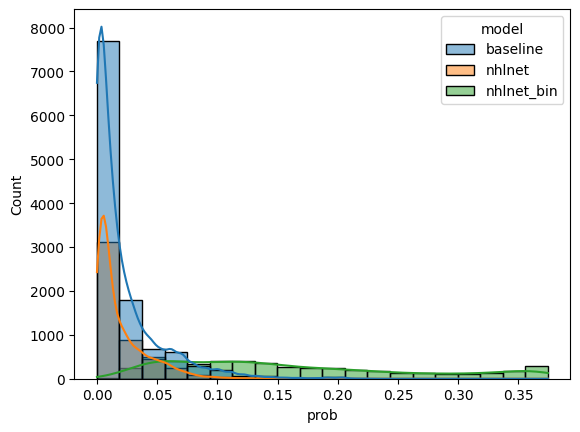

In [14]:
sns.histplot(data=combined, x='prob', hue='model', kde=True, bins=20, common_norm=True)

<Axes: xlabel='prob', ylabel='Density'>

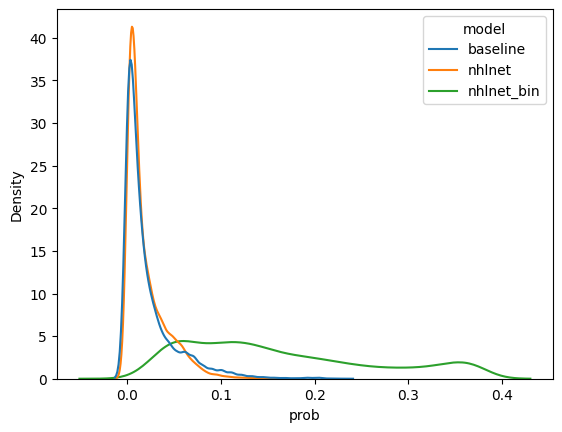

In [15]:
sns.kdeplot(data=combined, x='prob', hue='model', common_norm=False)

<Axes: xlabel='EV', ylabel='Count'>

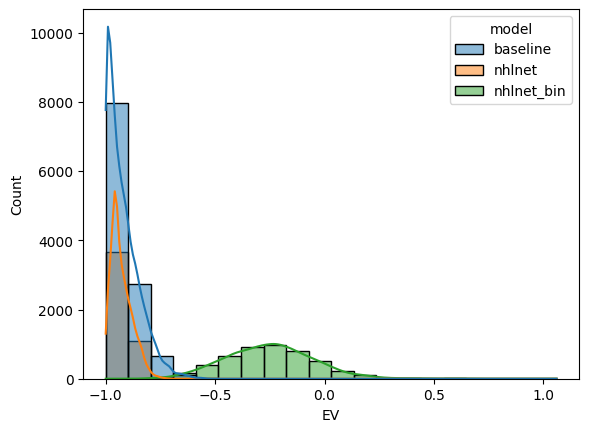

In [20]:
sns.histplot(data=combined, x='EV', hue='model', kde=True, bins=20)

<Axes: xlabel='EV', ylabel='Density'>

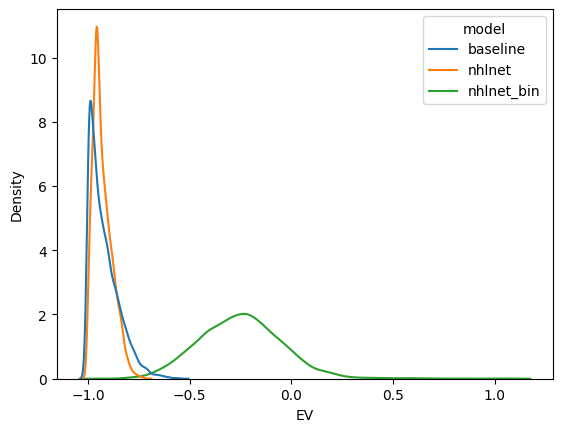

In [18]:
sns.kdeplot(data=combined, x='EV', hue='model', common_norm=False)

<Axes: xlabel='G_flag', ylabel='EV'>

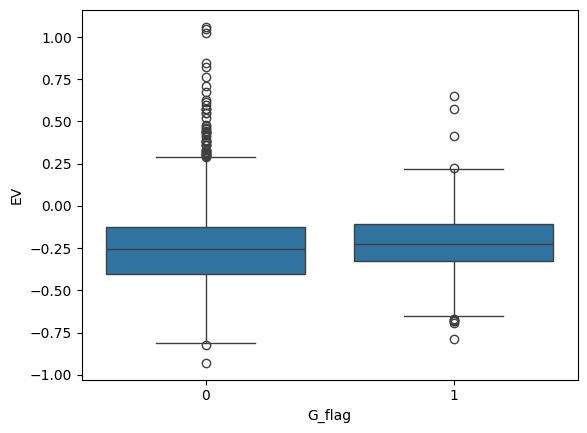

In [23]:
sns.boxplot(data=nhlnet_bin_bets, y='EV', x='G_flag')